# Extracting dataset from raw spreadsheets


This notebook involves data exploration, and ultimately outputs a dataframe - `projects_pct_complete` to a csv file. This dataframe contains every contract for which we have percent complete data

# Loading in the data

In [147]:
# Imports
#%pip install openpyxl --quiet --disable-pip-version-check

import glob
import math

import pandas as pd

import numpy as np
import openpyxl as xl


In [148]:
# Examine sheet names in the datasets
for yr in [2013, "2014 "] + list(range(2015, 2024)):
    print(yr)
    for f in glob.glob(f"../data/raw_data/*{yr}.xlsx"):
        wb = xl.load_workbook(f)
        print(wb.sheetnames)
    print("\n\n")


2013



2014 



2015



2016



2017



2018



2019



2020



2021



2022



2023





In [149]:
# Import data into dataframes

datasets_by_year = []

for yr in [2013, "2014 "] + list(range(2015, 2024)):
    
    month = 0
    
    for f in glob.glob(f"./data/*{yr}.xlsx"):
        wb = xl.load_workbook(f)
        
        # If "CONTRACTS" is not in a seperate sheet, it occupies the main sheet in the xlsx file
        if "CONTRACTS" not in wb.sheetnames:
            datasets_by_year.append(pd.read_excel(f, dtype='object'))
        else:
            datasets_by_year.append(pd.read_excel(f, dtype='object', sheet_name="CONTRACTS"))
            
        # indentifier for year of the spreadsheet
        datasets_by_year[-1]['archive_year'] = yr
        
        # identifier for month of the spreadsheet
        datasets_by_year[-1]['archive_month'] = month
        
        # Identifier for workbook
        datasets_by_year[-1]['archive_filename'] = f.split('/')[-1]
        
        month += 1

Design
Design
Projects
Projects


/Users/Tom/.pyenv/versions/3.12.1/envs/dio/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


PROJECTS
PROJECTS


/Users/Tom/.pyenv/versions/3.12.1/envs/dio/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


Minor Const & Family Housing
Planning and Design
Projects
Minor Const & Family Housing
Planning and Design
Projects


/Users/Tom/.pyenv/versions/3.12.1/envs/dio/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


Minor Const & Family Housing
Planning and Design
Projects
Minor Const & Family Housing
Planning and Design
Projects


/Users/Tom/.pyenv/versions/3.12.1/envs/dio/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


PROJECTS
PROJECTS
PROJECTS
PROJECTS
DETAILED EXPENDITURES
PROJECTS
DETAILED EXPENDITURES
PROJECTS
PROJECTS
PROJECTS


/Users/Tom/.pyenv/versions/3.12.1/envs/dio/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


CONTRACTS
EXPENDITURES
PROJECTS
CONTRACTS
EXPENDITURES
PROJECTS


/Users/Tom/.pyenv/versions/3.12.1/envs/dio/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


PROJECTS
PROJECTS
#REF
PROJECTS
#REF
PROJECTS


/Users/Tom/.pyenv/versions/3.12.1/envs/dio/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


PROJECTS
PROJECTS


/Users/Tom/.pyenv/versions/3.12.1/envs/dio/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


PROJECTS
PROJECTS
PROJECTS
PROJECTS


/Users/Tom/.pyenv/versions/3.12.1/envs/dio/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


PROJECTS
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#R

In [150]:
# Create combined dataframe, conatining all contract data from all spreadsheets:

all_df = pd.concat(datasets_by_year).reset_index(drop=True)

# Analysis 1 - identify a unique ID for contracts

In order to keep track of multiple project updates, we need unique IDs. This way we know when an actual cost data from different stages of completion are from the same contract.


## Conclusions
- The dataset has datapoints on contracts and projects. There may be many contracts associated with a project, but none of the projects have any cost data - only the contracts have cost data.
- Each contract is associated with a Title and a Project Number.
- project *numbers* can associate with multiple contracts. It seems as though the project number may refer to a project that has multiple contracts. Therefore, the project number is not unique.
- project *titles* can associated with multiple projects/contracts. Many of the titles are generic and get reused across projects - so we cannot use these as a unique ID either.

So no combintion of these can be used as a unique identifier for a contract

In [151]:
# Examine the columns we are interested in - it may be that they are not consistent across data entries

list(all_df.columns)

['Submittal Date',
 'Fiscal Year',
 'Component',
 'Project Type',
 'State or Country',
 'Unnamed: 5',
 'Installation',
 'Project Number',
 'Project Title',
 'Solicitation/ Advertise Date',
 'Award Date',
 'Contract Recipient',
 'Original Contract Amount ($000)',
 'Current Contract Obligation ($000)',
 'Start Date',
 'Occupancy Date',
 'Original Completion Date',
 'Current Completion Date',
 ' % Complete',
 'Funds Diverted ($000) (if applicable)',
 'Remarks',
 'archive_year',
 'archive_month',
 'archive_filename',
 'Data As Of Date',
 'Submission Date',
 'Project type',
 'State or country',
 'State or country title',
 'Project number',
 'Project title',
 'Solicitation/ advertise date',
 'Award date',
 'Contract recipient',
 'Original contract amount ($000)',
 'Current contract obligation ($000)',
 'Start date',
 'Occupancy date',
 'Original completion date',
 'Current completion date',
 '% complete',
 'Funds diverted ($000) (if applicable)',
 'Data as of Date',
 'State (2-Alpha)/ Countr

In [152]:
# We must homegenise the project numbers into one collumn
'Project Number'
'Project number'

all_df['combined_proj_nums'] = all_df[[
    'Project Number',
    'Project number'
]].apply(
    lambda x: ''.join(x.dropna().astype(str)), 
    axis=1
)

In [153]:
# The project titles must be homegenised into one collumn
'Project Title'
'Project title'

all_df['combined_titles'] = all_df[[
    'Project Title',
    'Project title'
]].apply(
    lambda x: ''.join(x.dropna().astype(str)), 
    axis=1
)

all_df['combined_titles'] = all_df['combined_titles'].apply(
    lambda x: None if x=='' else x
)

In [154]:
# Some of the project numbers are None
# If it turns out that the same project titles may be reused for different project numbers, then we are left with
# no way of tracing these projects through their subsequent updates in the datasheets

# So first check if the project titles are reused for different projects

# First create a dataframe without empty project numbers
proj_nums_df = all_df[all_df['combined_proj_nums'] != '']

# Output the number of projects with unique project titles 
len(all_df.drop_duplicates(subset=['combined_proj_nums']))

5181

In [155]:
# Now output the number of projects with unique codes and unique titles
len(
    all_df.drop_duplicates(
        subset=['combined_proj_nums']
    ).drop_duplicates(subset=['combined_titles'])
)

2321

In [156]:
# We can infer that because there are less in the second set, 
# that there are duplicated titles across different project numbers

# Conclusion: it is not possible to trace projects through different 
# stages of completion if they do not have project numbers

# Action: from now on use the dataframe where the missing project numbers have been removed


In [157]:
# For two (out of nearly 15,000) of the projects at the below indeces, pandas 
# decides to read the costs as dates and dates as integers
#30463
#30462
# Hence we use the below function to reverse this
from datetime import date

def date2Cost(cost):
    
    offset = 693594 # Value is used to correct for different baselines in excel datetime and python datetime
    year, month, day = int(cost[:11].split('-')[0]), int(cost[:11].split('-')[1]), int(cost[:11].split('-')[2])
    
    cost_date = date(year, month, day)
    
    cost = cost_date.toordinal()
    
    return cost


# We will use this function to format the cost:
# This is because some of the costs are floats, some are strings containing artefacts such as ',' or '\n' and
# some are None type. We want to coerce all into int

def formatCost(cost):
    
    if '-' in str(cost) and ':' in str(cost):
        cost = date2Cost(cost)
    
    if cost == None or cost == '':
        return float('nan')
    
    if type(cost) == str:
        cost = cost.strip("\n") 
        cost = ''.join(cost.split(','))
        
        cost = float(cost)
       
    if pd.isnull(cost):
        return float('nan')
        
    cost = float(cost)
    
    return cost



# Analysis 2 - completion percentage of contracts

In the following we determine that **after 2015, pct. complete is not reported for individual contracts**, only overall projects. 


## Conclusions

- We can't know the specific pct. complete values for these individual contracts **unless it is the only contract reported for that project**.

- If the project is 100% complete, we know all associated contracts will also be 100% complete.


For contracts and projects with the same project number in the same report,
the data as of date values are different - so potentially we cannot use these because the data
were recorded at different times

#### Result

The final contracts_pct_complete data frame contains the contracts that we can be confident have valid
pct_complete values and can therefore use for analysis

The complete_projects_df dataframe contains projects that we can match with contracts for a 
standard overrun analysis

In [ ]:
# We want to homeginise the following pct. complete columns
'Data As Of Date'
'Data as of Date'
'Contract Data as of Date'

proj_nums_df['data_date_combined'] = proj_nums_df[[
    'Data As Of Date',
    'Data as of Date',
    'Contract Data as of Date'
]].apply(
    lambda x: ''.join(x.dropna().astype(str)), 
    axis=1
)



/var/folders/z7/sh9lp16n1f997dpqzbly6cfh0000gp/T/ipykernel_31070/212952275.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proj_nums_df['data_date_combined'] = proj_nums_df[[


In [ ]:
# We also want to homegenise the 'data as of date' columns (these indicate when the given record was updated\when
# the data is from)
' % Complete'
'% complete'
'Percent Complete'
'% Complete'

proj_nums_df['combined_pct_complete'] = proj_nums_df[[
    ' % Complete',
    '% complete',
    'Percent Complete',
    '% Complete'
]].apply(
    lambda x: ''.join(x.dropna().astype(str)), 
    axis=1
)

/var/folders/z7/sh9lp16n1f997dpqzbly6cfh0000gp/T/ipykernel_31070/1775616311.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proj_nums_df['combined_pct_complete'] = proj_nums_df[[


In [ ]:
# Which years contain pct. complete data ?

proj_nums_df[proj_nums_df['combined_pct_complete'] != '']['archive_year'].unique()

array([2013, '2014 ', 2015], dtype=object)

In [ ]:
# We need to import the project data from years 2016 onward

projects_datasheets = []

for yr in list(range(2016, 2024)):
    
    month = 0
    
    for f in glob.glob(f"./data/*{yr}.xlsx"):
        
        projects_datasheets.append(pd.read_excel(f, dtype='object'))
            
        projects_datasheets[-1]['archive_year'] = yr
        projects_datasheets[-1]['archive_month'] = month
        
projects_df = pd.concat(projects_datasheets)




#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
PROJECTS
#REF
P

In [ ]:
# Create subset of projects_df containing only 100% complete contracts
# We can use these for standard schedule/cost overrun analysis
complete_projects_df = projects_df[projects_df['Construction Percent Complete'] == 1]

# - identify projects after 2015 which only have a single contract associated with them
# We can use these for uncertainty analysis
proj_nums_df['archive_year'] = proj_nums_df['archive_year'].astype(int)
post_2015_contracts = proj_nums_df[proj_nums_df['archive_year'] > 2015]

# Project numbers which are associated with just one project title
# dict in the form: { number: set(titles) } and then use numbers with set length > 1 to index dataframe
numbers2titles = {}
for i, row in post_2015_contracts.iterrows():
    numbers2titles.setdefault(row['combined_proj_nums'], set([row['Prime Contract Number ']]))
    numbers2titles[row['combined_proj_nums']].add(row['Prime Contract Number '])

one_contract_proj_names = [k for k, v in numbers2titles.items() if len(v)==1]

one_contract_proj_names

# - create a subset of projects_df containing only the project numbers that have a single contract associated 
# with them
one_contract_projects_df = projects_df[projects_df['Project Number'].isin(one_contract_proj_names)]


# Need a way of ensuring that the pct complete value is refering to the correct update.
# Maybe best way is to record which sheet the data came from, and make sure that matches
lmerge = one_contract_projects_df[~one_contract_projects_df['Project Number'].isna()]
rmerge = post_2015_contracts[~post_2015_contracts['combined_proj_nums'].isna()]
lmerge['Project Number'] = lmerge['Project Number'].astype(str)
rmerge['combined_proj_nums'] = rmerge['combined_proj_nums'].astype(str)

contracts_projects_merged = pd.merge(
    lmerge, 
    rmerge, 
    how="inner", 
    left_on=['Project Number', 'archive_year', 'archive_month'],
    right_on=['combined_proj_nums', 'archive_year', 'archive_month']
)


# Total number of projects where we can match project numbers with contracts
# These are the projects that consist of just one contract

len(contracts_projects_merged)

/var/folders/z7/sh9lp16n1f997dpqzbly6cfh0000gp/T/ipykernel_31070/3753624328.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proj_nums_df['archive_year'] = proj_nums_df['archive_year'].astype(int)


58177

In [ ]:
# In order to verify that the percent complete value is relevent to the contract data, we 
# can check that the update was made at the same time

# We also want to check that we have values for pct complete

# Create a new dataframe containing merged projects and contracts where the data as of dates 
# match
contracts_projects_merged_pct_complete = contracts_projects_merged[
    (contracts_projects_merged['Project Data as of Date'] == contracts_projects_merged['data_date_combined']) 
    & (~contracts_projects_merged['Construction Percent Complete'].isna())
]

# Number of projects/contracts where data was uploaded at the same time
len(contracts_projects_merged_pct_complete)



0

In [ ]:
# Create a dataframe which contains all contracts for which we have pct. complete data

contracts_pct_complete_left = proj_nums_df[proj_nums_df['combined_pct_complete'] != '']

# contracts_pct_complete = pd.merge(
#     contracts_pct_complete_left,
#     contracts_projects_merged_pct_complete, 
#     how="outer",
#     left_on=['combined_pct_complete'],
#     right_on=['Construction Percent Complete']
#     )

contracts_pct_complete = pd.concat(
    [contracts_pct_complete_left[contracts_pct_complete_left['archive_year'] <= 2015],
    contracts_projects_merged_pct_complete]
)

len(contracts_pct_complete)

40610

# Data Cleaning 1

## Homegenise columns

In the following we:
- Remove unnecesary columns from contracts_pct_complete dataframe
- Combine data from each column into a sensible column heading

In [165]:
# Some of the dates in the data provide days that are not in the month
# The following function reverts these data to the last day of the given month

month2day_count = {
    "01" : 31,
    "02" : 28,
    "03" : 31,
    "04" : 30,
    "05" : 31,
    "06" : 30,
    "07" : 31,
    "08" : 31,
    "09" : 30,
    "10" : 31,
    "11" : 30,
    "12" : 31
}

def correctDatesOver(x):
    try:
        if x == '':
            return float(np.nan)
        elif int(x.split('-')[2]) > month2day_count[x.split('-')[1]]:
            return f"{x.split('-')[0]}-{x.split('-')[1]}-{month2day_count[x.split('-')[1]]}"
        else:
            return x
    except:
        print(x)

#### Submission Date
I think - when the data were submitted to record keepers (so should be not long before data as
of date)

dtype = `datetime`

In [166]:
# Combine submission dates
contracts_pct_complete['Final.Submission Date'] = contracts_pct_complete[[
    'Submittal Date',
    'Submission Date',
    'Submittal date'
]].apply(
    lambda x: ''.join(x.dropna().astype(str)), 
    axis=1
).apply(
    lambda x: x if len(x) < 19 else x[:19] # Get rid of entries that have been double joined
).apply(
    lambda x: x if "/" not in x else f"{x.split('/')[2][:4]}-{x.split('/')[0]}-{x.split('/')[1]} 00:00:00"
).apply(
    lambda x: '' if len(x) < 10 else x[:10]
).apply(
    correctDatesOver
)

contracts_pct_complete['Final.Submission Date'] = pd.to_datetime(contracts_pct_complete['Final.Submission Date'])

#### Data as of Date
I think - when the data were collected

dtype = `datetime`

In [167]:
# Combine data as of data
contracts_pct_complete['Final.Data as of Date'] = contracts_pct_complete[[
    'Data As Of Date',
    'Data as of Date',
    'Contract Data as of Date',
    'Project Data as of Date'
]].apply(
    lambda x: ''.join(x.dropna().astype(str)), 
    axis=1
).apply(
    lambda x: x if len(x) < 19 else x[:19] # Get rid of entries that have been double joined
).apply(
    lambda x: x if "/" not in x else f"{x.split('/')[2][:4]}-{x.split('/')[0]}-{x.split('/')[1]} 00:00:00"
).apply(
    lambda x: '' if len(x) < 10 else x[:10]
).apply(
    correctDatesOver
)

contracts_pct_complete['Final.Data as of Date'] = pd.to_datetime(contracts_pct_complete['Final.Data as of Date'])

#### Project Title
Name of the project/contract work - these titles might be reused for multiple contracts under the same project title, or reused for multiple contracts from across various project numbers - so not a unique ID !

dtype = `string`

In [168]:
# Combine proj titles
contracts_pct_complete['Final.Project Title'] = contracts_pct_complete[[
    'Project Title',
    'Project title',
    'Project Title_x',
    # 'Project Title_y' is completely empty
]].apply(
    lambda x: ''.join(x.dropna().astype(str)), 
    axis=1
)

#### Project Number
ID of the project - these may be associated with multiple contracts but are never re-used!

dtype = `string`

In [169]:
# Combine proj nums
contracts_pct_complete['Final.Project Number'] = contracts_pct_complete[[
    'Project Number',
    'Project number',
    'Project Number_x',
    # 'Project Number_y' is identical to _x
]].apply(
    lambda x: ''.join(x.dropna().astype(str)), 
    axis=1
)

#### Fiscal year
Fiscal year for initial cost estimates ? Fiscal year usually aligns with contract 
solicitation date.

dtype = `int`

In [170]:
# Fiscal year

def formatFiscalYr(yr):
    yr = yr.strip().strip("A").strip("S")
    if yr == "1905-07-04 00:00:00":
        return float(np.nan)
    if yr == "2009/10/11/12/13":
        return float(np.nan) # could be any of these years?
    if yr == "2100":
        return float(np.nan) # could be 2001 or 2010 or something else (?)
    if yr == "":
        return float(np.nan)
    return yr

contracts_pct_complete['Final.Fiscal Year'] = contracts_pct_complete[[
    'Fiscal Year',
    'Project Fiscal Year',
    'Project Fiscal Year_x'
    # 'Project Fiscal Year_y' is identical to fiscal year_x
]].apply(
    lambda x: ''.join(x.dropna().astype(str)), 
    axis=1
).apply(formatFiscalYr).astype(float).astype("Int64")

#### Component
Seems to be which component of the overall defence sector the works pertain to 
(ie, army, air force)

**dtype = `string`**

In [171]:
# Component
contracts_pct_complete['Final.Component'] = contracts_pct_complete[[
    'Component',
    'Project Sponsor Component Name_x',
    'Project Sponsor Component Name',
    #'Project Sponsor Component Name_y' Identical to _x above
]].apply(
    lambda x: ''.join(x.dropna().astype(str)), 
    axis=1
)

#### Project Type
Family housing, major construction, minor construction, BRAC, etc

**dtype = `string`**

In [172]:
# Project type
contracts_pct_complete['Final.Project Type'] = contracts_pct_complete[[
    'Project Type', 
    'Project type', 
    'Construction Project Type',
    'Construction Project Type Name'
]].apply(
    lambda x: ''.join(x.dropna().astype(str)), 
    axis=1
)

#### Country/state code
Location in code form, ie GBR for Britain, or CA for California

**dtype = `string`**

In [173]:
# Country code
contracts_pct_complete['Final.Country or State Code'] = contracts_pct_complete[[
    'State or Country', 
    'State or country', 
    'State (2-Alpha)/ Country (3-Alpha)',
    'State (2-Alpha) / \nCountry (3-Alpha)'
]].apply(
    lambda x: ''.join(x.dropna().astype(str)),
    axis=1
)

#### Country/state name
The full name of the country/state

**dtype = `string`**

In [174]:
contracts_pct_complete['Final.Country or State Name'] = contracts_pct_complete[[
    'Unnamed: 5', 
    'State or country title', 
    'State or Country Title',
    'Country',
    'Country Name'
]].apply(
    lambda x: ''.join(x.dropna().astype(str)),
    axis=1
)

#### State name
State and country names are sometimes provided in seperate columns. In this case, the country
name goes into the country/state name column (above) and the state name is stored here

**dtype = `string`**

In [175]:
contracts_pct_complete['Final.State Name'] = contracts_pct_complete[[
    'State Name', 
    'State '
]].apply(
    lambda x: ''.join(x.dropna().astype(str)),
    axis=1
)

#### Installation
Site where the works took place

**dtype = `string`**

In [176]:
contracts_pct_complete['Final.Installation Site'] = contracts_pct_complete[[
    'Installation', 
    'Recipient Installation \n(if applicable)', 
    'Recipient Installation (If applicable)'
]].apply(
    lambda x: ''.join(x.dropna().astype(str)),
    axis=1
)

#### Solicitation date
The date the contract was advertised to potential contractors

**dtype = `datetime`**

In [ ]:
# Function to handle special formatting cases
def solFormats(x):
    if x == '39820':
        return ''
    elif x == '28 Jun1 2':
        return '2012-06-28 00:00:00'
    elif x == '11-Mar-09':
        return '2009-03-11 00:00:00'
    elif x == '11-Nov-08':
        return '2008-11-11 00:00:00'
    elif x == "Phase I - 22-Jan-2013 Phase II - 04-Apr-2013":
        return '2013-01-22 00:00:00'
    elif x == "Phase I - 21-Sep-2012 Phase II - 20-Dec-2012":
        return '2012-09-21 00:00:00'
    elif x == 'SSP Mod':
        return ''
    elif x == "PH II Apr 09":
        return '2009-04-17 00:00:00'
    elif x == "N/A (SSP Mod)":
        return ''
    elif x == '21-Sep-2012 \n':
        return '2012-09-21 00:00:00'
    elif x == '\n20-Dec-2012':
        return '2012-12-20 00:00:00'
    elif x == '\n04-\nApr-2013':
        return '2013-04-04 00:00:00'
    elif x == '22-Jan-2013 \n':
        return '2013-01-22 00:00:00'
    else:
        return x

# Combine solicitation dates
contracts_pct_complete['Final.Contract Solicitation Date'] = contracts_pct_complete[[
    'Solicitation/ Advertise Date',
    'Solicitation/ advertise date',
    'Solicitation Date',
    'Contract Solicitation Date'
]].apply(
    lambda x: ''.join(x.dropna().astype(str)), 
    axis=1
).apply(
    solFormats
).apply(
    lambda x: x if len(x) < 19 else x[:19] # Get rid of entries that have been double joined
).apply(
    lambda x: x if "/" not in x else f"{x.split('/')[2][:4]}-{x.split('/')[0]}-{x.split('/')[1]} 00:00:00"
).apply(
    lambda x: '' if len(x) < 10 else x[:10]
).apply(
    correctDatesOver
)

contracts_pct_complete['Final.Contract Solicitation Date'] = pd.to_datetime(contracts_pct_complete['Final.Contract Solicitation Date'])

#### Contract Award Date
The date the contract was awarded to the contractor

**dtype = `datetime`**

In [178]:
# Function to handle special formatting cases
def awardFormats(x):
    if x == '1 May 13 (':
        return "2013-05-01"
    elif x == '2013- 8-27':
        return "2013-08-27"
    else:
        return x

# Combine award dates
contracts_pct_complete['Final.Contract Award Date'] = contracts_pct_complete[[
    'Award Date',
    'Award date',
    'Contract Award Date'
]].apply(
    lambda x: ''.join(x.dropna().astype(str)), 
    axis=1
).apply(
    lambda x: x if len(x) < 19 else x[:19] # Get rid of entries that have been double joined
).apply(
    lambda x: x if "/" not in x else f"{x.split('/')[2][:4]}-{x.split('/')[0]}-{x.split('/')[1]} 00:00:00"
).apply(
    lambda x: '' if len(x) < 10 else x[:10]
).apply(
    awardFormats
).apply(
    correctDatesOver
)

contracts_pct_complete['Final.Contract Award Date'] = pd.to_datetime(contracts_pct_complete['Final.Contract Award Date'])

#### Contract Recipient
Contractor the contract was awarded to

**dtype = `string`**

In [179]:
# Combine contract recipients
contracts_pct_complete['Final.Contract Recipient'] = contracts_pct_complete[[
    'Contract Recipient',
    'Contract recipient',
    'Prime Contract Recipient\n(Company Name)',
    'Prime Contract Recipient Name'
]].apply(
    lambda x: ''.join(x.dropna().astype(str)), 
    axis=1
)

#### Estimated Cost
The original value of the contract

**dtype = `int`**

In [180]:
# Combine estimated costs
contracts_pct_complete['Final.Estimated Cost'] = contracts_pct_complete[[
    'Original Contract Amount ($000)', #thousands
    'Original contract amount ($000)', #thousands
    'Original Contract Amount\n($000)', #thousands
    'Original Contract Amount'
]].apply(
    lambda x: ''.join(x.dropna().astype(str)), 
    axis=1
)

#### Actual Cost
The current spend on contract work as of the update

**dtype = `int`**

In [181]:
# Combine actual costs
contracts_pct_complete['Final.Actual Cost'] = contracts_pct_complete[[
    'Current Contract Obligation ($000)', #thousands
    'Current contract obligation ($000)', #thousands    
    'Current Contract Obligation Amount',
    'Current Contract Obligation\n($000)' # thousands
]].apply(
    lambda x: ''.join(x.dropna().astype(str)), 
    axis=1
)

#### Start Date
Date when contract work commenced

**dtype = `datetime`**

In [182]:
# Function to handle special formatting cases
def startFormats(x):
    if x == ' 20 Feb 13':
        return "2013-02-20"
    elif x == '5-Apr-13 (':
        return "2013-04-05"
    else:
        return x

# Combine start dates
contracts_pct_complete['Final.Start Date'] = contracts_pct_complete[[
    'Start Date',
    'Start date',
    'Construction Start Date'
]].apply(
    lambda x: ''.join(x.dropna().astype(str)), 
    axis=1
).apply(
    lambda x: x if len(x) < 19 else x[:19] # Get rid of entries that have been double joined
).apply(
    lambda x: x if "/" not in x else f"{x.split('/')[2][:4]}-{x.split('/')[0]}-{x.split('/')[1]} 00:00:00"
).apply(
    lambda x: '' if len(x) < 10 else x[:10]
).apply(
    startFormats
).apply(
    correctDatesOver
)

contracts_pct_complete['Final.Start Date'] = pd.to_datetime(contracts_pct_complete['Final.Start Date'])

#### Occupancy Date
Date whent he project went into commission

**dtype = `datetime`**

In [183]:
# Function to handle special formatting cases
unfinished_kwords = ["estimated", "construction", "TBD", "projected"]
def servFormats(x):
    if any([kword in x for kword in unfinished_kwords]):
        return "Unfinished"
    elif x == "04 Oct '16":
        return "2016-10-04"
    elif x == " 1 Jul 11":
        return "2011-07-01"
    elif x == " 5 Jan 13":
        return "2013-01-05"
    elif x == "April, 2013":
        return "2013-04-17"
    elif x == "Spring 2013":
        return "2013-04-17"
    else:
        return x

# Combine Occupancy dates
contracts_pct_complete['Final.Placed in Service Date'] = contracts_pct_complete[[
    'Occupancy Date',
    'Occupancy date',
    'Placed-In-Service Date',
    'Placed-In-Service\nDate',
    'Current RPA Placed-In-Service Date'
]].apply(
    lambda x: ''.join(x.dropna().astype(str)), 
    axis=1
)

# Transfer estimated dates from actuals columns to estimates column
words = "estimated|projected|construction"
contracts_pct_complete['Final.Estimated Commissioning Date'] = float(np.nan)
contracts_pct_complete.loc[
    contracts_pct_complete['Final.Placed in Service Date'].str.contains(words),
    'Final.Estimated Commissioning Date'
] = contracts_pct_complete.loc[
    contracts_pct_complete['Final.Placed in Service Date'].str.contains(words),
    'Final.Placed in Service Date'
]

# This caused an error
# There's only about 30 of these data points, so str format is acceptable for these dates
#contracts_pct_complete['Final.Estimated Commissioning Date'] = pd.to_datetime(contracts_pct_complete['Final.Estimated Commissioning Date'])

# Handle special format cases, and mark unfinished projs in placed in service column
contracts_pct_complete[
    'Final.Placed in Service Date'
] = contracts_pct_complete[
    'Final.Placed in Service Date'
].apply(
    servFormats
)

# Populate indicator for unfinished projects
contracts_pct_complete['Is it unfinished'] = float(np.nan)
contracts_pct_complete.loc[
    contracts_pct_complete['Final.Placed in Service Date'] == "Unfinished",
    'Is it unfinished'
] = "Yes"
contracts_pct_complete.loc[
    contracts_pct_complete['Final.Placed in Service Date'] == "Unfinished",
    'Final.Placed in Service Date'
] = ""

# Format dates
contracts_pct_complete[
    'Final.Placed in Service Date'
] = contracts_pct_complete[
    'Final.Placed in Service Date'
].apply(
    lambda x: x if len(x) < 19 else x[:19] # Get rid of entries that have been double joined
).apply(
    lambda x: x if "/" not in x else f"{x.split('/')[2][:4]}-{x.split('/')[0]}-{x.split('/')[1]} 00:00:00"
).apply(
    lambda x: '' if len(x) < 10 else x[:10]
).apply(
    correctDatesOver
)

contracts_pct_complete['Final.Placed in Service Date'] = pd.to_datetime(contracts_pct_complete['Final.Placed in Service Date'])

/var/folders/z7/sh9lp16n1f997dpqzbly6cfh0000gp/T/ipykernel_31070/1353418773.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['under construction' 'under construction' 'under construction'
 'under construction' 'under construction' 'projected for       Oct 13'
 'under construction / Sep 12' 'projected for Aug 13' 'under construction'
 'under construction / 30 Sep 13' '16 Mar 13 (estimated)'
 '23 Feb 13 (estimated)' 'under construction' '18 Apr 13 (estimated)'
 '26 Oct 12 (estimated)' 'under construction / Nov 13'
 'projected for Dec 12' 'under construction' 'under construction'
 'projected for Apr 13' 'under construction' 'under construction'
 'under construction' 'under construction' 'under construction'
 'projected for       Oct 13' 'projected for Aug 13' 'under construction'
 'under construction / 30 Sep 13' 'under construction'
 '18 Apr 13 (estimated)' 'under construction / Nov 13'
 'under constr

#### Estimated Completion Date
The original expected completion of the contract work

**dtype = `datetime`**

In [184]:
# Handle special formatting cases
def estFormats(x):
    if x == "30-Ja n-14":
        return "2014-01-30"
    else:
        return x

# Combine estimated completion dates
contracts_pct_complete['Final.Estimated Construction Completion Date'] = contracts_pct_complete[[
    'Original Completion Date',
    'Original completion date',
    ' Original Contract Completion Date',
    ' Original Construction Completion Date'
]].apply(
    lambda x: ''.join(x.dropna().astype(str)), 
    axis=1
).apply(
    lambda x: x if len(x) < 19 else x[:19] # Get rid of entries that have been double joined
).apply(
    lambda x: x if "/" not in x else f"{x.split('/')[2][:4]}-{x.split('/')[0]}-{x.split('/')[1]} 00:00:00"
).apply(
    lambda x: '' if len(x) < 10 else x[:10]
).apply(
    estFormats
).apply(
    correctDatesOver
)

contracts_pct_complete['Final.Estimated Construction Completion Date'] = pd.to_datetime(contracts_pct_complete['Final.Estimated Construction Completion Date'])

#### Current Completion Date
The current expected completion date of the works as of the update

**dtype = `datetime`**

In [185]:
# Function to handle special formating cases
def actFormats(x):
    if x == "9/262014":
        return "2014-09-26"
    elif x == " 20 Feb 2013":
        return "2013-02-20"
    elif x == "41638":
        return ""
    elif x == "04 Sep '16":
        return "2016-09-04"
    elif x == "April, 2013":
        return "2013-04-17"
    elif x == "40421":
        return ""
    elif x == "41988":
        return ""
    elif x == "11 msy 16":
        return "2016-05-11"
    elif x == "31-Apr-2015":
        return "2015-04-31"
    else:
        return x

# Combine actual completion dates
contracts_pct_complete['Final.Actual Construction Completion Date'] = contracts_pct_complete[[
    'Current Completion Date',
    'Current completion date',
    ' Current Contract Completion Date',
    'Current Construction Completion Date'
]].apply(
    lambda x: ''.join(x.dropna().astype(str)), 
    axis=1
)

contracts_pct_complete.loc[
    contracts_pct_complete['Final.Actual Construction Completion Date'] == "TBD",
    'Is it unfinished'
] = "Yes"


contracts_pct_complete[
    'Final.Actual Construction Completion Date'
] = contracts_pct_complete[
    'Final.Actual Construction Completion Date'
].apply(
    actFormats
).apply(
    lambda x: x if len(x) < 19 else x[:19] # Get rid of entries that have been double joined
).apply(
    lambda x: x if "/" not in x else f"{x.split('/')[2][:4]}-{x.split('/')[0]}-{x.split('/')[1]} 00:00:00"
).apply(
    lambda x: '' if len(x) < 10 else x[:10]
).apply(
    lambda x: "2014-02-29" if x == "2014-2-29 " else x
).apply(
    correctDatesOver
)

contracts_pct_complete['Final.Actual Construction Completion Date'] = pd.to_datetime(contracts_pct_complete['Final.Actual Construction Completion Date'])

#### Percent Complete
The progress made on the work as of update, given as a percentage of overall work

**dtype = `float`**
`0 <= x <= 1`

In [186]:
# Combine pct Complete Values

# Construction Percent Complete - already to correct scale
#  % Complete - all need to be divided by 100
#TODO: All the rest are a mess so will have to look by year or even month

# Handle special cases
def formatPct(pct):
    pct = pct.strip().strip("%")
    if pct == " ":
        return float(np.nan)
    if pct == "":
        return float(np.nan)
    if pct == "23:45:36":
        return float(np.nan)
    else:
        return pct

contracts_pct_complete['Final.Completion Percentage'] = contracts_pct_complete[[
    ' % Complete',
    '% complete',
    'Percent Complete',
    '% Complete',
    'Construction Percent Complete'
]].apply(
    lambda x: ''.join(x.dropna().astype(str)), 
    axis=1
).apply(formatPct).astype(float)

#### Funds Diverted
Not sure what this means

**dtype = `int`**

In [187]:
# Combine diverted funds
contracts_pct_complete['Final.Diverted Funds'] = contracts_pct_complete[[
    'Funds Diverted ($000) (if applicable)',
    'Funds diverted ($000) (if applicable)',
    'Funds Diverted ($000) \n(if applicable)',
    'Funds Diverted ($000)\n if applicable',
    'Diverted Funds Amount\n($000)',
    'Diverted Funds Total Amount'
]].apply(
    lambda x: ''.join(x.dropna().astype(str)), 
    axis=1
)

#### Remarks

Comments/notes on the contract

**dtype = `string`**

In [188]:
# Combine remarks columns
contracts_pct_complete['Final.Remarks'] = contracts_pct_complete[[
    'Remarks',
    'Notes/Remarks',
    'Contract Remarks',
    'Project Remarks',
    # 'Project Remarks.1' duplicate of Project Remarks
]].apply(
    lambda x: ''.join(x.dropna().astype(str)), 
    axis=1
)

#### Recipient Project

Not sure what this means

**dtype = `string`**

In [189]:
# Combine recipient project columns
contracts_pct_complete['Final.Recipient Project'] = contracts_pct_complete[[
    'Recipient Project    \n(if applicable)',
    'Recipient Project    (If applicable)',
    'Diverted Funds Recipient Project    \n',
    'Diverted Funds Recipient Project',
    'Diverted Funds Recipient Text'
]].apply(
    lambda x: ''.join(x.dropna().astype(str)), 
    axis=1
)

#### Recipient installation
Not sure what this means

**dtype = `string`**


In [190]:
# Combine recipient site columns
contracts_pct_complete['Final.Recipient Site'] = contracts_pct_complete[[
    'Recipient Installation \n(if applicable)',
    'Recipient Installation (If applicable)',
    'Diverted Funds Recipient Site Identifier Text'
]].apply(
    lambda x: ''.join(x.dropna().astype(str)), 
    axis=1
)

#### Prime Contract Number

Not sure what this means - potentially identifier for contracts, but sparsely populated so not overly useful

**dtype = `string`**


In [191]:
# Combine prime contract number columns
contracts_pct_complete['Final.Prime Contract Number'] = contracts_pct_complete[[
    'Prime Contract Number '
]].apply(
    lambda x: ''.join(x.dropna().astype(str)), 
    axis=1
)

#### Parent Project Number
Some projects apperently oversee multiple sub-projects. These are the high level unique IDs for *overseeing* projects

**dtype = `string`**

In [192]:
# Combine parent project number columns
contracts_pct_complete['Final.Parent Project Number'] = contracts_pct_complete[[
    'Parent Project Number \n[Initial Appropriation]'
]].apply(
    lambda x: ''.join(x.dropna().astype(str)), 
    axis=1
)

#### Sub-project number

Some projects apperently oversee multiple sub-projects. These are the high level unique IDs for
*overseen* projects

**dtype = `string`**

In [193]:
# Combine parent project number columns
contracts_pct_complete['Final.Sub Project Number'] = contracts_pct_complete[[
    'Sub-Project Number', # Emtpy column
    'Sub-Project Number_x'
]].apply(
    lambda x: ''.join(x.dropna().astype(str)), 
    axis=1
)

# Values are duplicated in _x and _y, bu they both have unique values as well - so just use
# _x and replace NA values with _y
contracts_pct_complete.loc[
    contracts_pct_complete['Final.Sub Project Number'] == '',
    'Final.Sub Project Number'
] = contracts_pct_complete.loc[
    contracts_pct_complete['Final.Sub Project Number'] == '',
    'Sub-Project Number_y'
]

In [194]:
# Double check which final columns we have left over - do we need them ?

contracts_pct_complete.drop([
    'Submittal Date',
    'Submission Date',
    'Submittal date',
    'Data As Of Date',
    'Data as of Date',
    'Contract Data as of Date',
    'Project Data as of Date',
    'Project Title',
    'Project title',
    'Project Title_x',
    'Project Title_y', #is completely empty
    'Project Number',
    'Project number',
    'Project Number_x',
    'Project Number_y', #is identical to _x
    'Fiscal Year',
    'Project Fiscal Year',
    'Project Fiscal Year_x',
    'Project Fiscal Year_y', #is identical to fiscal year_x
    'Component',
    'Project Sponsor Component Name_x',
    'Project Sponsor Component Name',
    'Project Sponsor Component Name_y',
    'Project Type', 
    'Project type', 
    'Construction Project Type',
    'Construction Project Type Name',
    'State or Country', 
    'State or country', 
    'State (2-Alpha)/ Country (3-Alpha)',
    'State (2-Alpha) / \nCountry (3-Alpha)',
    'Unnamed: 5', 
    'State or country title', 
    'State or Country Title',
    'Country',
    'Country Name',
    'State Name', 
    'State ',
    'Installation', 
    'Recipient Installation \n(if applicable)', 
    'Recipient Installation (If applicable)',
    'Solicitation/ Advertise Date',
    'Solicitation/ advertise date',
    'Solicitation Date',
    'Contract Solicitation Date',
    'Award Date',
    'Award date',
    'Contract Award Date',
    'Contract Recipient',
    'Contract recipient',
    'Prime Contract Recipient\n(Company Name)',
    'Prime Contract Recipient Name',
    'Original Contract Amount ($000)', #thousands
    'Original contract amount ($000)', #thousands
    'Original Contract Amount\n($000)', #thousands
    'Original Contract Amount',
    'Original Contract Amount ($000)', #thousands
    'Original contract amount ($000)', #thousands
    'Original Contract Amount\n($000)', #thousands
    'Original Contract Amount',
    'Current Contract Obligation ($000)', #thousands
    'Current contract obligation ($000)', #thousands    
    'Current Contract Obligation Amount',
    'Current Contract Obligation\n($000)', # thousands
    'Start Date',
    'Start date',
    'Construction Start Date',
    'Occupancy Date',
    'Occupancy date',
    'Placed-In-Service Date',
    'Placed-In-Service\nDate',
    'Current RPA Placed-In-Service Date',
    'Original Completion Date',
    'Original completion date',
    ' Original Contract Completion Date',
    ' Original Construction Completion Date',
    'Current Completion Date',
    'Current completion date',
    ' Current Contract Completion Date',
    'Current Construction Completion Date',
    ' % Complete',
    '% complete',
    'Percent Complete',
    '% Complete',
    'Construction Percent Complete',
    'Funds Diverted ($000) (if applicable)',
    'Funds diverted ($000) (if applicable)',
    'Funds Diverted ($000) \n(if applicable)',
    'Funds Diverted ($000)\n if applicable',
    'Diverted Funds Amount\n($000)',
    'Diverted Funds Total Amount',
    'Remarks',
    'Notes/Remarks',
    'Contract Remarks',
    'Project Remarks',
    'Project Remarks.1', #duplicate of Project Remarks
    'Sub-Project Number_y',
    'Sub-Project Number', # Emtpy column
    'Sub-Project Number_x',
    'Parent Project Number \n[Initial Appropriation]',
    'Prime Contract Number ',
    'Recipient Installation \n(if applicable)',
    'Recipient Installation (If applicable)',
    'Diverted Funds Recipient Site Identifier Text',
    'Recipient Project    \n(if applicable)',
    'Recipient Project    (If applicable)',
    'Diverted Funds Recipient Project    \n',
    'Diverted Funds Recipient Project',
    'Diverted Funds Recipient Text',
    'Unnamed: 23',
    'combined_proj_nums',
    'combined_titles',
    'data_date_combined',
    'combined_pct_complete'
], axis=1, inplace=True)

# Data Cleaning 2

In this section we do the following: 
- get all columns in the correct formats (ie, datetime for start date, int for cost, etc)
- normalise pct complete to 0 >= x >= 1
- and correct the different cost scales - ie, some are given in thousands of dollars and some are just given in dollars


## Cleaning 2, part 1 - cost

In [195]:
# Function to handle costs which appear as dates, or contain string chars

from datetime import date

def date2Cost(cost):
    
    offset = 693594 # Value is used to correct for different baselines in excel datetime and python datetime
    year, month, day = int(cost[:11].split('-')[0]), int(cost[:11].split('-')[1]), int(cost[:11].split('-')[2])
    
    cost_date = date(year, month, day)
    
    cost = cost_date.toordinal()
    
    return cost

def formatCost(cost):    
    
    if '-' in str(cost) and ':' in str(cost):
        cost = date2Cost(cost)
    
    if cost == None or cost == '' or cost == ' ':
        return float('nan')
    
    if type(cost) == str:
        cost = cost.strip("\n") 
        cost = ''.join(cost.split(','))
        
        # Handle individual cases
        if '(Reprogrammed to P&D) $5700  ' in cost:
            cost = 5700
            
        elif 'o' in cost: # Guessing 0, but could be typo as well ?
            cost = float('nan')
        
        cost = float(cost)
       
    if pd.isnull(cost):
        return float('nan')
        
    cost = float(cost)
    
    return cost

In [196]:
# Format costs

contracts_pct_complete[
    'Final.Estimated Cost'
] = contracts_pct_complete['Final.Estimated Cost'].apply(formatCost)

contracts_pct_complete[
    'Final.Actual Cost'
] = contracts_pct_complete['Final.Actual Cost'].apply(formatCost)

contracts_pct_complete[
    'Final.Diverted Funds'
] = contracts_pct_complete['Final.Diverted Funds'].apply(formatCost)

In [197]:
# Convert thousands values into single units

contracts_pct_complete.loc[
    ((contracts_pct_complete['archive_year'] == 2013)
    | (contracts_pct_complete['archive_year'] == 2014) 
    | (contracts_pct_complete['archive_year'] == 2015)),
    "Final.Estimated Cost"
] = contracts_pct_complete.loc[
    ((contracts_pct_complete['archive_year'] == 2013)
    | (contracts_pct_complete['archive_year'] == 2014) 
    | (contracts_pct_complete['archive_year'] == 2015)),
    "Final.Estimated Cost"
].apply(lambda x: np.nan if x == '' else float(x) * 1000)

contracts_pct_complete.loc[
    ((contracts_pct_complete['archive_year'] == 2013)
    | (contracts_pct_complete['archive_year'] == 2014) 
    | (contracts_pct_complete['archive_year'] == 2015)),
    "Final.Actual Cost"
] = contracts_pct_complete.loc[
    ((contracts_pct_complete['archive_year'] == 2013)
    | (contracts_pct_complete['archive_year'] == 2014) 
    | (contracts_pct_complete['archive_year'] == 2015)),
    "Final.Actual Cost"
].apply(lambda x: np.nan if x == '' else float(x) * 1000)

contracts_pct_complete.loc[
    ((contracts_pct_complete['archive_year'] == 2013)
    | (contracts_pct_complete['archive_year'] == 2014) 
    | (contracts_pct_complete['archive_year'] == 2015)),
    "Final.Diverted Funds"
] = contracts_pct_complete.loc[
    ((contracts_pct_complete['archive_year'] == 2013)
    | (contracts_pct_complete['archive_year'] == 2014) 
    | (contracts_pct_complete['archive_year'] == 2015)),
    "Final.Diverted Funds"
].apply(lambda x: np.nan if x == '' else float(x) * 1000)


In [198]:
# Round to nearest integer

# Format costs

contracts_pct_complete.loc[
    ~contracts_pct_complete['Final.Estimated Cost'].isna(),
    'Final.Estimated Cost'
] = contracts_pct_complete.loc[
    ~contracts_pct_complete['Final.Estimated Cost'].isna(),
    'Final.Estimated Cost'
].apply(round).astype(np.int64)

contracts_pct_complete.loc[
    ~contracts_pct_complete['Final.Actual Cost'].isna(),
    'Final.Actual Cost'
] = contracts_pct_complete.loc[
    ~contracts_pct_complete['Final.Actual Cost'].isna(),
    'Final.Actual Cost'
].apply(round).astype(np.int64)

contracts_pct_complete.loc[
    ~contracts_pct_complete['Final.Diverted Funds'].isna(),
    'Final.Diverted Funds'
] = contracts_pct_complete.loc[
    ~contracts_pct_complete['Final.Diverted Funds'].isna(),
    'Final.Diverted Funds'
].apply(round).astype(np.int64)

In [199]:
# Convert to int
# We needed to convert to 'Int64' type because python's int primitive doesn't handle NAs in pandas

contracts_pct_complete['Final.Estimated Cost'] = contracts_pct_complete['Final.Estimated Cost'].astype('Int64') 
contracts_pct_complete['Final.Actual Cost'] = contracts_pct_complete['Final.Actual Cost'].astype('Int64') 
contracts_pct_complete['Final.Diverted Funds'] = contracts_pct_complete['Final.Diverted Funds'].astype('Int64') 


## Cleaning 2, part 2 - completion percentage

In [200]:
# What range of values do we have for pct complete for each year and month?
# Some of the files are missing because they only contained duplicates

for year in contracts_pct_complete.archive_year.unique():
    for month in contracts_pct_complete.archive_month.unique():

        filename = contracts_pct_complete[
            (contracts_pct_complete.archive_year == year) &
            (contracts_pct_complete.archive_month == month)
        ].archive_filename.unique().tolist()

        min_pct = contracts_pct_complete[
            (contracts_pct_complete.archive_year == year) &
            (contracts_pct_complete.archive_month == month)
        ]["Final.Completion Percentage"].min()
        
        max_pct = contracts_pct_complete[
            (contracts_pct_complete.archive_year == year) &
            (contracts_pct_complete.archive_month == month)
        ]["Final.Completion Percentage"].max()
        
        if len(filename) < 1:
            continue
        
        print(
            f"""
            Archive year: {year}\n
            Archive month: {month}\n
            File name: {filename}\n
            Min: {min_pct}\n
            Max: {max_pct}\n\n
            """)


            Archive year: 2013

            Archive month: 0

            File name: ['MilCon Status Report - January, 2013.xlsx']

            Min: 0.0

            Max: 100.0


            

            Archive year: 2013

            Archive month: 1

            File name: ['MilCon Status Report - May, 2013.xlsx']

            Min: 0.0

            Max: 100.360271810312


            

            Archive year: 2013

            Archive month: 2

            File name: ['MilCon Status Report - September, 2013.xlsx']

            Min: 0.0

            Max: 100.430189908122


            

            Archive year: 2013

            Archive month: 3

            File name: ['MilCon Status Report - March, 2013.xlsx']

            Min: 0.0

            Max: 100.0


            

            Archive year: 2013

            Archive month: 4

            File name: ['MilCon Status Report - July, 2013.xlsx']

            Min: 0.0

            Max: 100.0


            

            Archive

In [201]:
# For the above that go from 0 to 1, we can be confident that these are already normalised
# For the ones that go from 0 to 100, it is not clear if the scale is consistent.

# Lets print out the filenames which go up to 100 only
# What range of values do we have for pct complete for each year and month?
# Some of the files are missing because they only contained duplicates

for year in contracts_pct_complete.archive_year.unique():
    for month in contracts_pct_complete.archive_month.unique():

        filename = contracts_pct_complete[
            (contracts_pct_complete.archive_year == year) &
            (contracts_pct_complete.archive_month == month)
        ].archive_filename.unique().tolist()

        min_pct = contracts_pct_complete[
            (contracts_pct_complete.archive_year == year) &
            (contracts_pct_complete.archive_month == month)
        ]["Final.Completion Percentage"].min()
        
        max_pct = contracts_pct_complete[
            (contracts_pct_complete.archive_year == year) &
            (contracts_pct_complete.archive_month == month)
        ]["Final.Completion Percentage"].max()
        
        if len(filename) < 1:
            continue
            
        if max_pct <= 1:
            continue
        
        print(
            f"""
            Archive year: {year}\n
            Archive month: {month}\n
            File name: {filename}\n
            Min: {min_pct}\n
            Max: {max_pct}\n\n
            """)


            Archive year: 2013

            Archive month: 0

            File name: ['MilCon Status Report - January, 2013.xlsx']

            Min: 0.0

            Max: 100.0


            

            Archive year: 2013

            Archive month: 1

            File name: ['MilCon Status Report - May, 2013.xlsx']

            Min: 0.0

            Max: 100.360271810312


            

            Archive year: 2013

            Archive month: 2

            File name: ['MilCon Status Report - September, 2013.xlsx']

            Min: 0.0

            Max: 100.430189908122


            

            Archive year: 2013

            Archive month: 3

            File name: ['MilCon Status Report - March, 2013.xlsx']

            Min: 0.0

            Max: 100.0


            

            Archive year: 2013

            Archive month: 4

            File name: ['MilCon Status Report - July, 2013.xlsx']

            Min: 0.0

            Max: 100.0


            

            Archive


            Archive year: 2014

            Archive month: 1

            File name: ['MilCon Status Report - March, 2014 .xlsx']

            Min: 0.0

            Max: 100.468797303891


            

            Archive year: 2014

            Archive month: 3

            File name: ['MilCon Status Report - February, 2014 .xlsx']

            Min: 0.0

            Max: 100.46402279311899


            

            Archive year: 2014

            Archive month: 4

            File name: ['MilCon Status Report - May, 2014 .xlsx']

            Min: 0.0

            Max: 101.63049586869299


            

            Archive year: 2014

            Archive month: 5

            File name: ['MilCon Status Report - September, 2014 .xlsx']

            Min: 0.0

            Max: 100.0


            

            Archive year: 2014

            Archive month: 6

            File name: ['MilCon Status Report - June, 2014 .xlsx']

            Min: 0.0

            Max: 101.63049586869299



In [202]:
# Go through the above list of files one-by-one to verify that the percentages are on the same
# scale

# Projects that are on the same scale, and need to be normalised to 0 >= % >= 1:

must_normalise = [
    'MilCon Status Report - January, 2013.xlsx',
    'MilCon Status Report - May, 2013.xlsx',
    'MilCon Status Report - September, 2013.xlsx',
    'MilCon Status Report - March, 2013.xlsx',
    'MilCon Status Report - July, 2013.xlsx',
    'MilCon Status Report - August, 2013.xlsx',
    'MilCon Status Report - November, 2013.xlsx',
    'MilCon Status Report - June, 2013.xlsx',
    'MilCon Status Report - January, 2014 .xlsx',
    'MilCon Status Report - March, 2014 .xlsx',
    'MilCon Status Report - February, 2014 .xlsx',
    'MilCon Status Report - May, 2014 .xlsx',
    'MilCon Status Report - June, 2014 .xlsx',
    'MilCon Status Report - August, 2014 .xlsx',
    'MilCon Status Report - July, 2014 .xlsx',
    'MilCon Status Report - April, 2014 .xlsx'
]

contracts_pct_complete.loc[
    contracts_pct_complete.archive_filename.str.contains('|'.join(must_normalise)),
    "Final.Completion Percentage"
] = contracts_pct_complete.loc[
    contracts_pct_complete.archive_filename.str.contains('|'.join(must_normalise)),
    "Final.Completion Percentage"
] / 100

In [203]:
# Projects where the scale isn't obviously consistent:
# 'MilCon Status Report - September, 2014 .xlsx' <- only two projs in here are normalised
# 'MilCon Status Report - June, 2015.xlsx' <- complete 50/50 mix of scales
inconsistent_scale = [
    "MilCon Status Report - September, 2014 .xlsx",
    "MilCon Status Report - June, 2015.xlsx"
]


contracts_pct_complete.loc[
    contracts_pct_complete.archive_filename.str.contains('|'.join(inconsistent_scale)),
    "Final.Completion Percentage"
] = contracts_pct_complete.loc[
    contracts_pct_complete.archive_filename.str.contains('|'.join(inconsistent_scale)),
    "Final.Completion Percentage"
].apply(lambda x: float(x)/100 if float(x) > 1 else float(x))

    

In [204]:
# What is the range of the pct complete data now?

contracts_pct_complete["Final.Completion Percentage"].min(), contracts_pct_complete["Final.Completion Percentage"].max()

(0.0, 1.01630495868693)

In [205]:
# Double check that columns are all in the correct format

contracts_pct_complete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40610 entries, 0 to 47958
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   archive_year                                  40610 non-null  int64         
 1   archive_month                                 40610 non-null  int64         
 2   archive_filename                              40610 non-null  object        
 3   Final.Submission Date                         29916 non-null  datetime64[ns]
 4   Final.Data as of Date                         36811 non-null  datetime64[ns]
 5   Final.Project Title                           40610 non-null  object        
 6   Final.Project Number                          40610 non-null  object        
 7   Final.Fiscal Year                             40601 non-null  Int64         
 8   Final.Component                               40610 non-null  object   

# Conclusion

The final dataset, `all-contracts.csv`, contains cost and schedule data for ~50k contracts. These contracts also contain a completion percentage. We have removed instances of duplicates and merged contract data with project where we can be certain they are the same project. Tgis is the clean dataset to use for any analysis.

array([[<Axes: title={'center': 'Final.Completion Percentage'}>]],
      dtype=object)

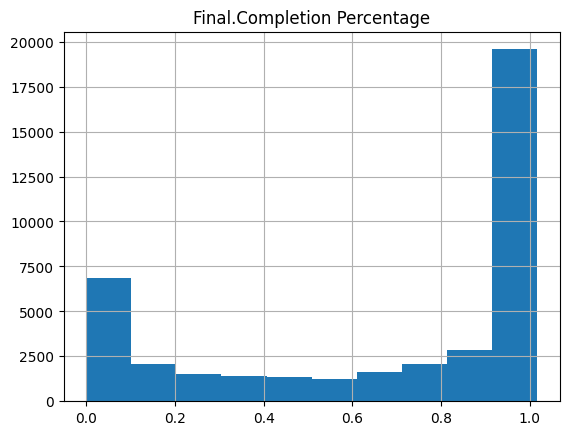

In [206]:
import matplotlib.pyplot as plt

contracts_pct_complete.hist(column = "Final.Completion Percentage")

array([[<Axes: title={'center': 'Final.Completion Percentage'}>]],
      dtype=object)

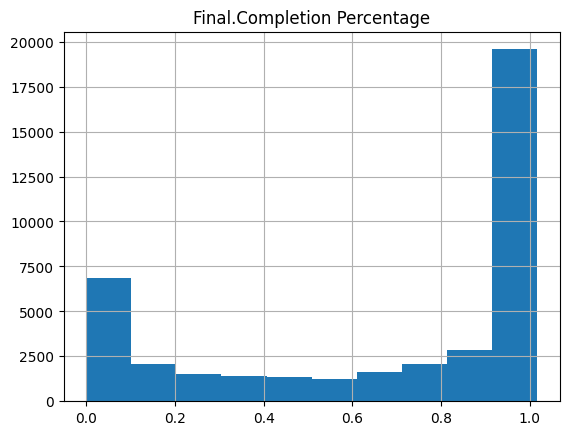

In [207]:
import matplotlib.pyplot as plt

contracts_pct_complete.hist(column = "Final.Completion Percentage")

array([[<Axes: title={'center': 'Final.Completion Percentage'}>]],
      dtype=object)

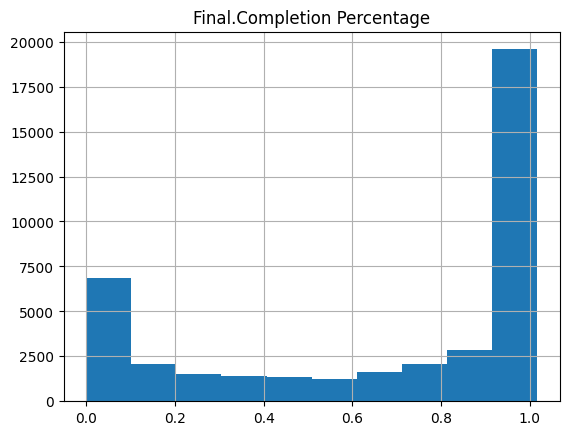

In [208]:
import matplotlib.pyplot as plt

contracts_pct_complete.hist(column = "Final.Completion Percentage")

In [209]:
contracts_pct_complete["Final.Completion Percentage"].mean()

0.6686698213704705

In [210]:
contracts_pct_complete["Final.Completion Percentage"].median()

0.894107232674336

In [211]:
# Clean dataset

for i, col in enumerate(contracts_pct_complete.columns):
    if col.startswith("Final"):
        contracts_pct_complete.rename(columns={col: col[6:]}, inplace=True)

contracts_pct_complete.drop(columns=['Is it unfinished'], inplace=True)

In [212]:
# remove 5% contingecy and add to new column

contracts_pct_complete["Estimated Cost (exc. contingency)"] = contracts_pct_complete["Estimated Cost"] / 1.05

In [213]:
#contracts_pct_complete.to_csv("../data/datasets/all-contracts.csv", index=False)